 Evaluación subjetiva de imágenes mejoradas usando Python, mostrando cada imagen con una zona ampliada o ROI (Region of Interest)


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from utils import *
import matplotlib.patches as patches
#from ImagePreprocessing.utils import *
from utils import *



In [2]:
def mostrar_imagen_con_roi(imagen, roi, titulo, esquina_superior_izquierda, ancho, alto):
    """
    Muestra una imagen con una zona ampliada o ROI.

    Parámetros:
        imagen: La imagen a mostrar.
        roi: La zona ampliada (ROI).
        titulo: El título de la ventana.
        esquina_superior_izquierda: Una tupla (x, y) que representa las coordenadas de la esquina superior izquierda de la ROI.
        ancho: El ancho de la ROI.
        alto: El alto de la ROI.
    """
    # Crear una figura de Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Mostrar la imagen original en el primer eje
    axes[0].imshow(imagen, cmap='gray', aspect='auto')
    axes[0].set_title(titulo)
    axes[0].axis('off')

    # Dibujar un rectángulo alrededor de la ROI en la imagen original
    rect = patches.Rectangle(esquina_superior_izquierda, ancho, alto, linewidth=2, edgecolor='r', facecolor='none')
    axes[0].add_patch(rect)

    # Mostrar la zona ampliada (ROI) en el segundo eje
    axes[1].imshow(roi, cmap='gray', aspect='auto')
    axes[1].set_title('Zona ampliada')
    axes[1].axis('off')


    # Ajustar el layout de la figura
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [5]:
path = r"D:\Documentos\Universidad de Cuenca\Trabajo de Titulación\Datasets_EL\Policristalino\Poli_Sup_V44.5_I9.16_t30\Poli_Sup_V40_I4.5_t28\dataset_artefacts"
entrada_path = read_folder_path(path)
salida_path = read_folder_path(path + "\\imgROI")

dataset_Comparacion = read_images(entrada_path)
print("Cantidad de imagenes: ", len(dataset_Comparacion))

# Imprimir el nombre de los archivos de la carpeta path
file_names = os.listdir(entrada_path)
for file_name in file_names:
    print(file_name)

EL = dataset_Comparacion[0]
BG = dataset_Comparacion[1]
EL_NoBG = dataset_Comparacion[2]
EL_NoArtefacts = dataset_Comparacion[3]
BG_NoArtefacts = dataset_Comparacion[4]
EL_NoBG_NoArtefacts = dataset_Comparacion[5]

Cantidad de imagenes:  6
00_EL.jpg
01_BG.jpg
02_EL_NoBG.jpg
03_EL_No_Artefacts.jpg
04_BG_No_Artefacts.jpg
05_EL_NoBG_NoArtefacts.jpg


In [23]:
# Define el tamaño del ROI (en píxeles)
roi_ancho = 128
roi_alto = 128

# Define la posición del ROI (en coordenadas x, y)
roi_x = 368
roi_y = 139

# Extrae la zona ampliada (ROI) de la imagen original
#roi = imagen_original[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]

roi_6_6 = EL_NoBG_NoArtefacts[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho] 

# Extrae la zona ampliada (ROI) de las fracciones de Isc
roi_1_6 = EL[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_2_6 = BG[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_3_6 = EL_NoBG[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_4_6 = EL_NoArtefacts[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_5_6 = BG_NoArtefacts[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
#roi_6_6 = EL_NoBG_NoArtefacts[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]


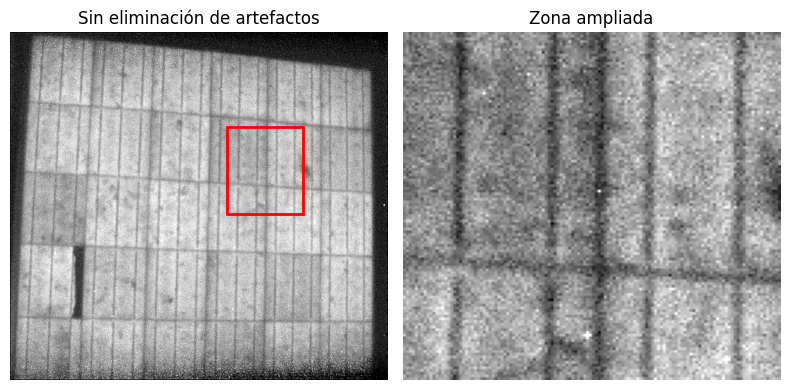

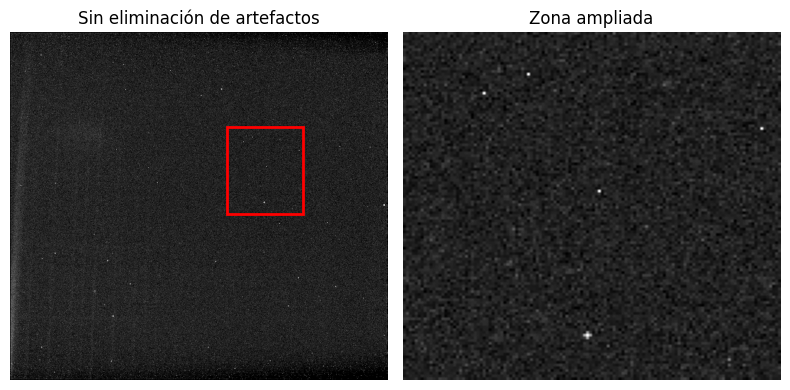

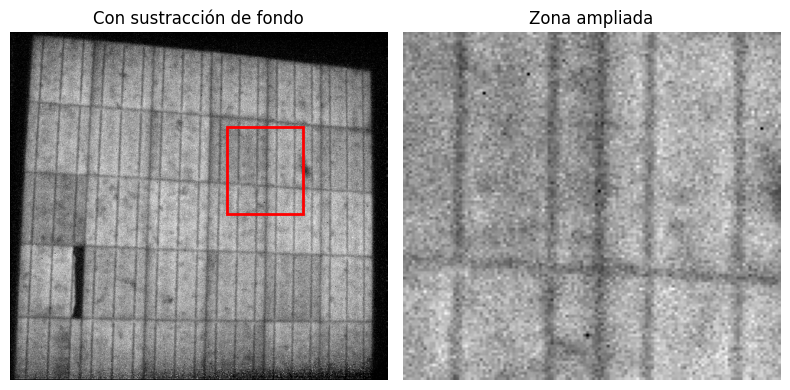

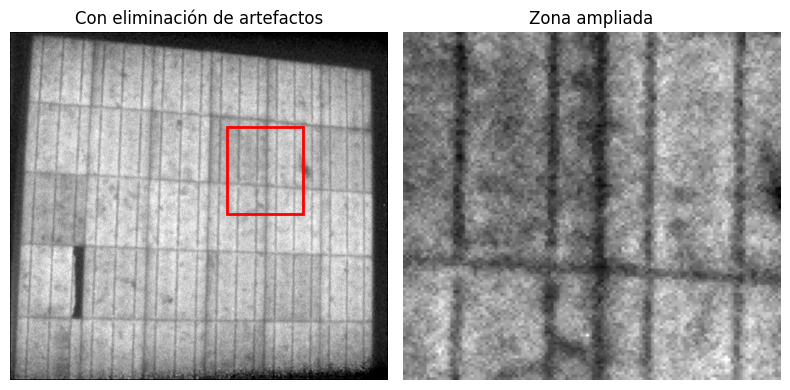

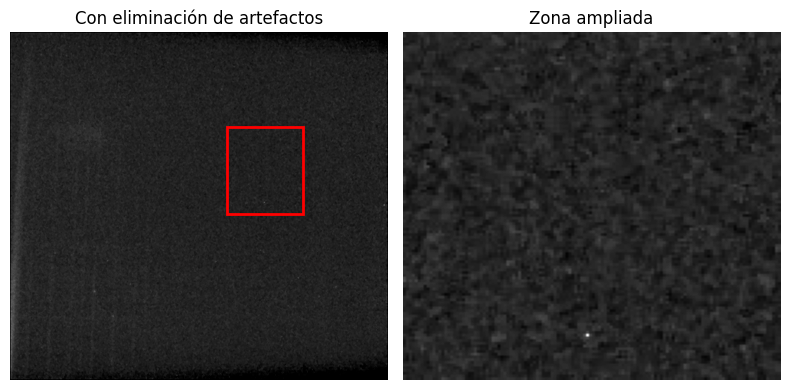

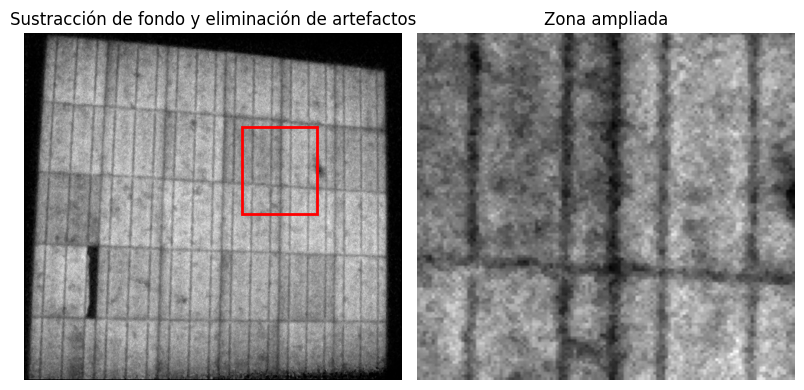

In [27]:
mostrar_imagen_con_roi(EL, roi_1_6, 'Sin eliminación de artefactos', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(BG, roi_2_6, 'Sin eliminación de artefactos', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(EL_NoBG, roi_3_6, 'Con sustracción de fondo', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(EL_NoArtefacts, roi_4_6, 'Con eliminación de artefactos', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(BG_NoArtefacts, roi_5_6, 'Con eliminación de artefactos', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(EL_NoBG_NoArtefacts, roi_6_6, 'Sustracción de fondo y eliminación de artefactos', (roi_x, roi_y), roi_ancho, roi_alto)